In [1]:
#Libraries used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

10. Using the Boston data set, fit classification models in order to predict whether a given suburb has a
crime rate above or below the median. Explore logistic regresttion, and KNN models using various
subsets of the predictors. Describe your findings.

In [2]:
data = pd.read_csv(r'C:\Users\shrik\Downloads\HW3 data\Boston.csv')
data

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
data['chas'].unique()

array([0, 1], dtype=int64)

In [4]:
median_crime = data['crim'].median()
median_crime

0.25651

In [5]:
data["crime"] = np.where(data['crim'] > median_crime,1, 0)
data.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crime
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


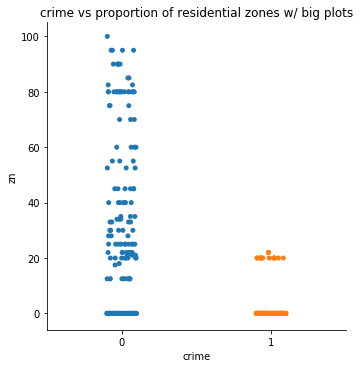

In [6]:
sns.catplot(x="crime", y="zn", data=data).set(title='crime vs proportion of residential zones w/ big plots')

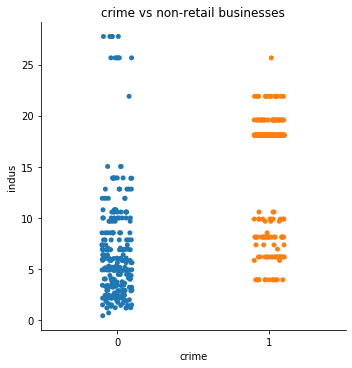

In [7]:
sns.catplot(x="crime", y="indus", data=data).set(title='crime vs non-retail businesses')

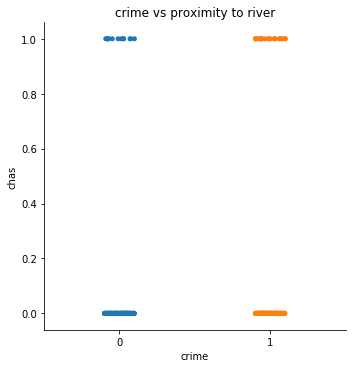

In [8]:
sns.catplot(x="crime", y="chas", data=data).set(title='crime vs proximity to river')

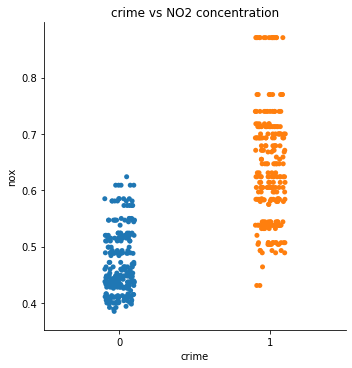

In [9]:
sns.catplot(x="crime", y="nox", data=data).set(title='crime vs NO2 concentration')

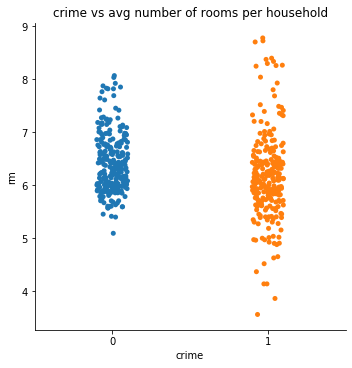

In [10]:
sns.catplot(x="crime", y="rm", data=data).set(title='crime vs avg number of rooms per household')

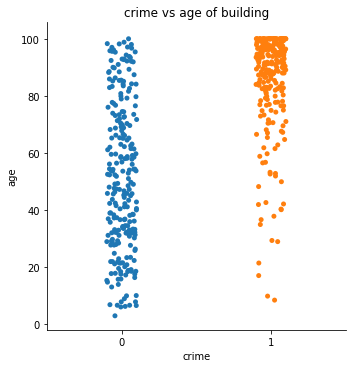

In [11]:
sns.catplot(x="crime", y="age", data=data).set(title='crime vs age of building')

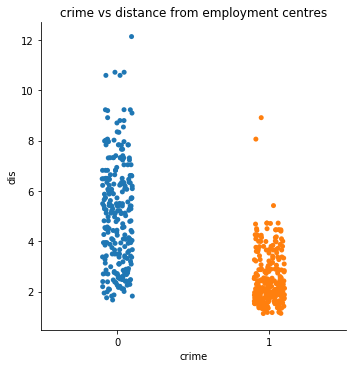

In [12]:
sns.catplot(x="crime", y="dis", data=data).set(title='crime vs distance from employment centres')

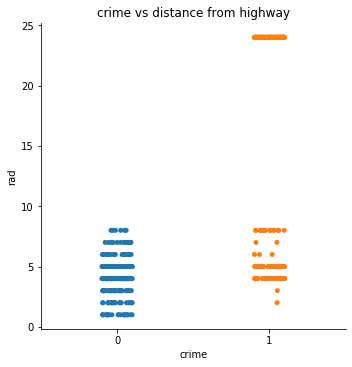

In [13]:
sns.catplot(x="crime", y="rad", data=data).set(title='crime vs distance from highway')

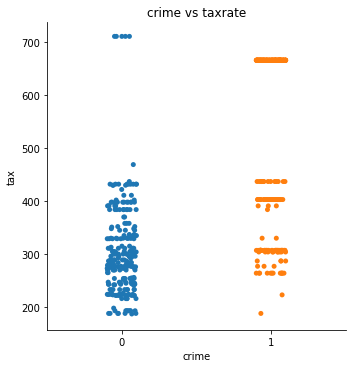

In [14]:
sns.catplot(x="crime", y="tax", data=data).set(title='crime vs taxrate')

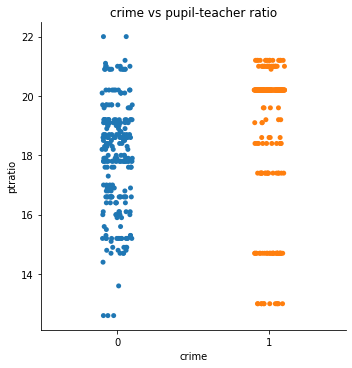

In [15]:
sns.catplot(x="crime", y="ptratio", data=data).set(title='crime vs pupil-teacher ratio')

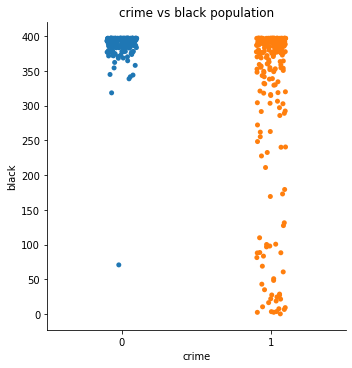

In [16]:
sns.catplot(x="crime", y="black", data=data).set(title='crime vs black population')

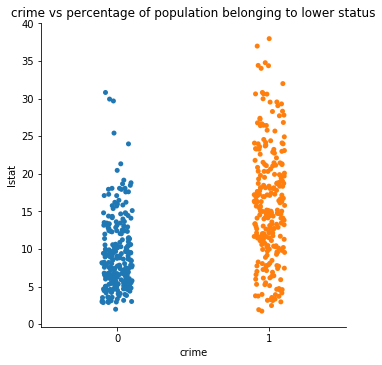

In [17]:
sns.catplot(x="crime", y="lstat", data=data).set(title='crime vs percentage of population belonging to lower status')

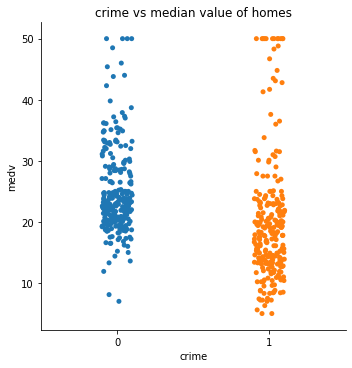

In [18]:
sns.catplot(x="crime", y="medv", data=data).set(title='crime vs median value of homes')

In [19]:
factors = ['zn','nox','dis','tax','ptratio','rad','age','medv','lstat']
X = pd.DataFrame(data[factors].copy())
y = data['crime'].copy()
X

,zn,nox,dis,tax,ptratio,rad,age,medv,lstat
0,18.0,0.538,4.0900,296,15.3,1,65.2,24.0,4.98
1,0.0,0.469,4.9671,242,17.8,2,78.9,21.6,9.14
2,0.0,0.469,4.9671,242,17.8,2,61.1,34.7,4.03
3,0.0,0.458,6.0622,222,18.7,3,45.8,33.4,2.94
4,0.0,0.458,6.0622,222,18.7,3,54.2,36.2,5.33
...,...,...,...,...,...,...,...,...,...
501,0.0,0.573,2.4786,273,21.0,1,69.1,22.4,9.67
502,0.0,0.573,2.2875,273,21.0,1,76.7,20.6,9.08
503,0.0,0.573,2.1675,273,21.0,1,91.0,23.9,5.64
504,0.0,0.573,2.3889,273,21.0,1,89.3,22.0,6.48


In [20]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.284794
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.589     
Dependent Variable: crime            AIC:              306.2120  
Date:               2022-02-06 02:33 BIC:              344.2508  
No. Observations:   506              Log-Likelihood:   -144.11   
Df Model:           8                LL-Null:          -350.73   
Df Residuals:       497              LLR p-value:      2.7352e-84
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
zn        -0.0657     0.0219   -3.0019   0.0027   -0.1086   -0.0228
nox       10.5765     2.9143    3.6291   0.0003    4.8646

Since we can see that the p value is much greater for the columns age, medv and lstat, when compared to the other predictors. We are going to remove them from our predictor.

In [21]:
factors = ['zn','nox','dis','tax','ptratio','rad']
X = pd.DataFrame(data[factors].copy())

In [22]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.292673
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.578     
Dependent Variable: crime            AIC:              308.1849  
Date:               2022-02-06 02:33 BIC:              333.5442  
No. Observations:   506              Log-Likelihood:   -148.09   
Df Model:           5                LL-Null:          -350.73   
Df Residuals:       500              LLR p-value:      2.1589e-85
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
zn        -0.0714     0.0212   -3.3594   0.0008   -0.1130   -0.0297
nox        9.3081     2.0725    4.4913   0.0000    5.2461

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=43)

In [24]:
logreg = LogisticRegression(solver='lbfgs', max_iter=400)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [26]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix_1)

[[38  4]
 [10 50]]


The result is telling us that we have 47+42 correct predictions and 5+8 incorrect predictions.

As we know, the error rate = (No. of False Positives + Number of False negatives)/Total number of observations

So we get Test Error = 14/102 = 0.137


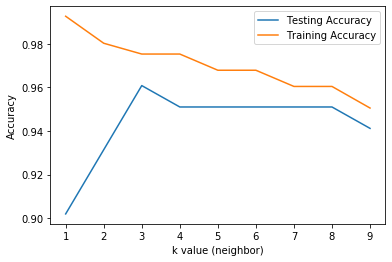

In [27]:
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
 
plt.legend()
plt.xlabel('k value (neighbor)')
plt.ylabel('Accuracy')
plt.show()

In [28]:
#We're taking k=3 since we know that this is the most accurate fit
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)
y_pred2

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [29]:
knn.score(X_test, y_test)

0.9607843137254902

In [30]:
confusion_matrix = confusion_matrix(y_test, y_pred2)
print(confusion_matrix)

[[42  0]
 [ 4 56]]


The result is telling us that we have 31+39 correct predictions and 5+5 incorrect predictions.

As we know, the error rate = (No. of False Positives + Number of False negatives)/Total number of observations

So we get Error rate = 4/102 = 0.039
